<a href="https://colab.research.google.com/github/bloomfieldfong/Ciencia-de-datos/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file = "proyecto_training_data.npy"
raw_data = np.load(file)
header = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
data = pd.DataFrame(raw_data,columns=header)


Separacion de datos de entrenamiento y de pruebas


In [190]:
##Separacion de la data en 80% y 20%    
training_data = raw_data[:1168,:]
test_data = raw_data[1168:,:]

print(training_data.shape)
print(test_data.shape)

(1168, 6)
(292, 6)



# **Analisis exploratorio**

Se establecio un correlativo para cada una de las columnas de nuestro data frame:

* 0 SalesPrice 
* 1 OverallQual
* 2 1stFlrSF (First Floor square feet) 
* 3 TotRmsAbvGrd 
* 4 YearBuilt 
* 5 LotFrontage

In [191]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [192]:
ptp = [raw_data[0].ptp(),raw_data[1].ptp(),raw_data[2].ptp(), raw_data[3].ptp(), raw_data[4].ptp(), raw_data[5].ptp()]
print("   Peak to Peak\n")
datas = pd.DataFrame([ptp],columns=header)
print(datas)


   Peak to Peak

   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208493.0     181494.0  223494.0      139993.0   249992.0     142995.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


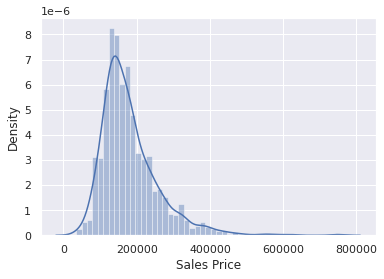

In [193]:
sns.set_theme()
sales_price_plot_data = pd.Series(data['SalePrice'], name="Sales Price")
sales_price_plot = sns.distplot(sales_price_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


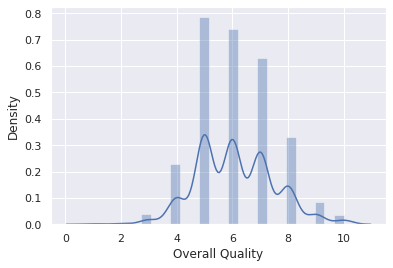

In [182]:
sns.set_theme()
OverallQual_plot_data = pd.Series(data['OverallQual'], name="Overall Quality")
OverallQual_plot = sns.distplot(OverallQual_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


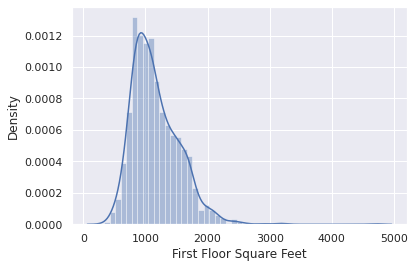

In [ ]:
sns.set_theme()
FirstFlrSF_plot_data = pd.Series(data['1stFlrSF'], name="First Floor Square Feet")
FirstFlrSF_plot = sns.distplot(FirstFlrSF_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


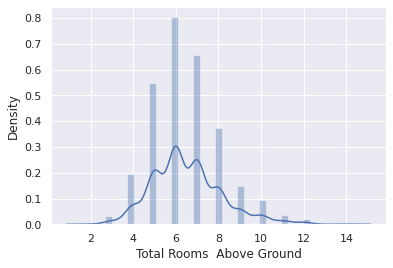

In [ ]:
sns.set_theme()
TotRmsAbvGrd_plot_data = pd.Series(data['TotRmsAbvGrd'], name="Total Rooms  Above Ground")
TotRmsAbvGrd_plot = sns.distplot(TotRmsAbvGrd_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


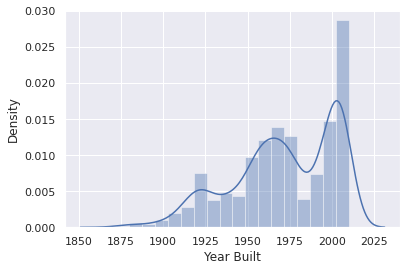

In [ ]:
sns.set_theme()
YearBuilt_plot_data = pd.Series(data['YearBuilt'], name="Year Built")
YearBuilt_plot = sns.distplot(YearBuilt_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


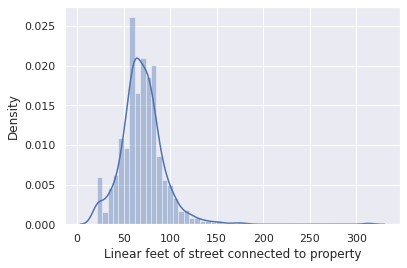

In [ ]:
sns.set_theme()
LotFrontage_plot_data = pd.Series(data['LotFrontage'], name="Linear feet of street connected to property")
LotFrontage_plot = sns.distplot(LotFrontage_plot_data)

# **Correlación entre variables**

Text(0, 0.5, 'OverallQuality')

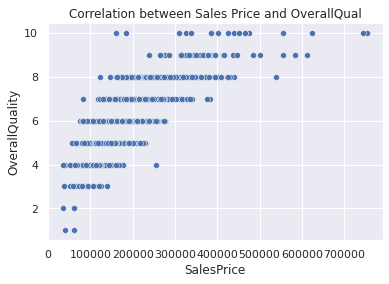

In [ ]:
corrSaleQuality = sns.scatterplot(x=data['SalePrice'], y=data['OverallQual'], data=data)
corrSaleQuality.set_title("Correlation between Sales Price and OverallQual")
corrSaleQuality.set_xlabel("SalesPrice")
corrSaleQuality.set_ylabel("OverallQuality")


Text(0, 0.5, 'First Floor square feet')

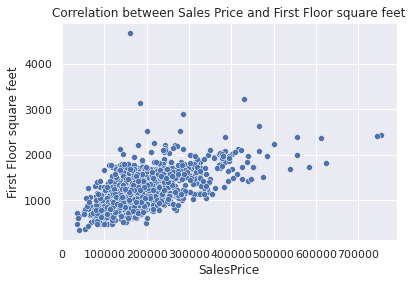

In [ ]:
corrSale1stFlrSF = sns.scatterplot(x=data['SalePrice'], y=data['1stFlrSF'], data=data)
corrSale1stFlrSF.set_title("Correlation between Sales Price and First Floor square feet")
corrSale1stFlrSF.set_xlabel("SalesPrice")
corrSale1stFlrSF.set_ylabel("First Floor square feet")


Text(0, 0.5, 'Total rooms above grade')

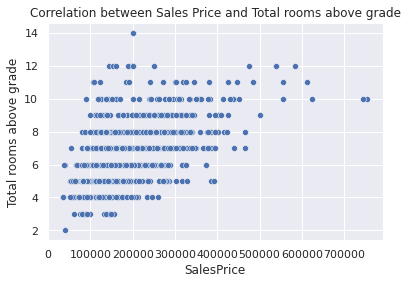

In [ ]:
corrSaleTotRmsAbvGrd = sns.scatterplot(x=data['SalePrice'], y=data['TotRmsAbvGrd'], data=data)
corrSaleTotRmsAbvGrd.set_title("Correlation between Sales Price and Total rooms above grade")
corrSaleTotRmsAbvGrd.set_xlabel("SalesPrice")
corrSaleTotRmsAbvGrd.set_ylabel("Total rooms above grade")

Text(0, 0.5, 'Year Built')

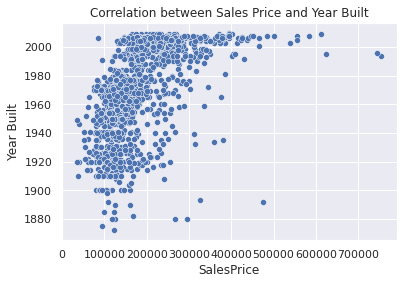

In [ ]:
corrSaleYearBuilt= sns.scatterplot(x=data['SalePrice'], y=data['YearBuilt'], data=data)
corrSaleYearBuilt.set_title("Correlation between Sales Price and Year Built")
corrSaleYearBuilt.set_xlabel("SalesPrice")
corrSaleYearBuilt.set_ylabel("Year Built")

Text(0, 0.5, 'Lot Frontage')

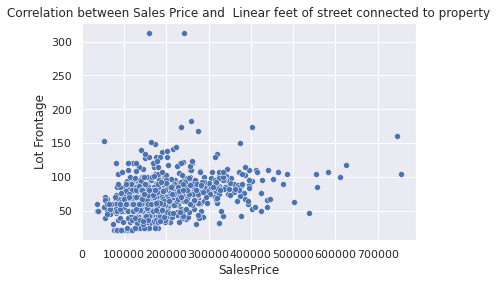

In [ ]:
corrSaleLotFrontage= sns.scatterplot(x=data['SalePrice'], y=data['LotFrontage'], data=data)
corrSaleLotFrontage.set_title("Correlation between Sales Price and  Linear feet of street connected to property")
corrSaleLotFrontage.set_xlabel("SalesPrice")
corrSaleLotFrontage.set_ylabel("Lot Frontage")

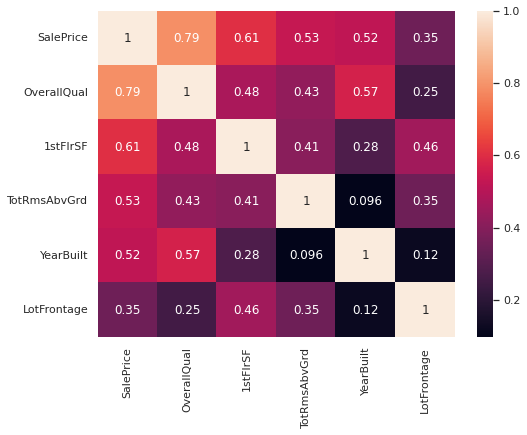

In [ ]:
correlation_table = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True)
plt.show()

Se realizo un mapa de calor de los valores de correlación y se grafico para cada variable una gráfica scatter con la variable Sales Price para saber que datos tienen mayor linearidad con la variable que queremos predecir. 
La columna 0 es la que debemos observar en el mapa de calor ya que nuestra predicción estará entorno a la variable Sales Price. 
En base a lo observado en las correlaciones de cada una de las variales y en el mapa de calor se estara utilizando las variables OverallQual y 1stFlrSF. 

# **Modelo de predicción**

In [209]:
def modelo(x,y, epochs, imprimir_error_cada, learning_rate):
  ## m y b inicializados en 0 
  mb = np.array([0.0,0.0]) 
  x = x.reshape(len(x), 1)
  ones = np.ones(len(x)).reshape(len(x), 1)
  ##creacion de la vector x [valorx, 1]
  x = np.append(x, ones, axis = 1)
  error = np.zeros(epochs)
  modelo = np.ones((epochs,2))
  ##duplicamos la data para el modelo
  for i in range(epochs):
    ##calculo de yhat
    yhat = np.dot(x,mb)
    error[i] = (np.average((y-yhat)**2))/2
    ##calculo del gradiente con la tabla x [val_x, 1]
    gradiente = np.dot(yhat-y, x) / len(y)
    ## Actualizacion de parametros
    mb -= (learning_rate * gradiente)
    modelo[i] = mb
    ## calculo del error cada x tiempo
    if ((i+1) % imprimir_error_cada) == 0:
        print("Error Iteracion: "+ str(i+1)+" "+str(error[i]))
  return modelo, error

  

In [210]:
def graficar_error(error):
  n_iter = range(0,len(error))
  fig = plt.figure()
  graph_error = fig.add_subplot(111)
  graph_error.plot(n_iter , error, label = "error")
  graph_error.legend()
  graph_error.set_title("Losses")
  graph_error.set_xlabel("Iteración")
  graph_error.set_ylabel("Error")
  plt.show()

In [211]:
def graficar_modelo(x, y, modelo, n):
  x = x.reshape(len(x), 1)
  ones = np.ones(len(x)).reshape(len(x), 1)
  reshaped_x = np.append(x, ones, axis = 1)
  for i in range(0,len(modelo),n):
    yhat = np.dot(reshaped_x,modelo[i])
    mb =  modelo[i]
    plt.scatter(x,y)
    plt.plot(x,yhat, color='r')
    plt.title("Iteración N = "+str(i+1)+" m="+str(mb[0])+" b="+str(mb[1])+"")
    plt.show()

# **Entrenamiento de Variable OverallQuality (Learning Rate = 0.05)**

> Indented block



Error Iteracion: 5000 9.345149746734591e+25
Error Iteracion: 10000 4.882958027790289e+41
Error Iteracion: 15000 2.5514068524654e+57
Error Iteracion: 20000 1.333142101522263e+73
Error Iteracion: 25000 6.965834794769196e+88
Error Iteracion: 30000 3.639736104096459e+104
Error Iteracion: 35000 1.901807794437568e+120
Error Iteracion: 40000 9.937184409918887e+135
Error Iteracion: 45000 5.192303569560434e+151
Error Iteracion: 50000 2.713043780446038e+167


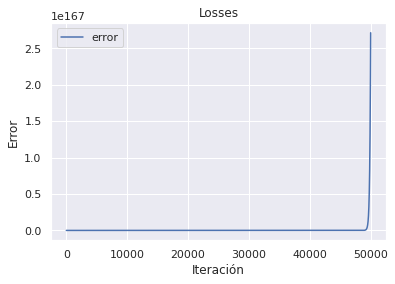

In [203]:
ephoch = 50000
error = 5000
lr = 0.05
modelo, errores = modelo(training_data[:,1],training_data[:,0],ephoch,error,lr)
graficar_error(errores)

Podemos ver que a lo largo de las iteraciones el error va aumentando con el tiempo por lo cual el learning rate de 0.05 no es adecuado.

# **Entrenamiento de Variable OverallQuality (Learning Rate = 0.01)**


Error Iteracion: 5000 1301299905.89088
Error Iteracion: 10000 1243070711.8082504
Error Iteracion: 15000 1206803935.6589093
Error Iteracion: 20000 1184215969.725532
Error Iteracion: 25000 1170147550.6604793
Error Iteracion: 30000 1161385344.4674246
Error Iteracion: 35000 1155927996.5582824
Error Iteracion: 40000 1152529007.1319637
Error Iteracion: 45000 1150412021.1320653
Error Iteracion: 50000 1149093502.8427575


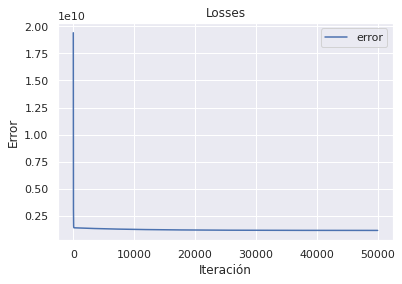

In [208]:
ephoch = 50000
error = 5000
lr = 0.001
modelo_overall, errores2 = modelo(training_data[:,1],training_data[:,0],ephoch,error,lr)
graficar_error(errores2)

Podemos notar que con un learning rate de 0.01 se reduce el error por el cual se se asume que es un buen laerning rate y buen modelo.

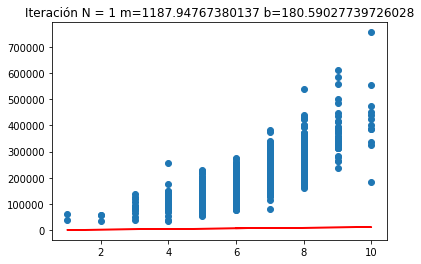

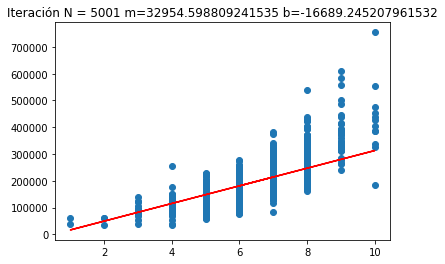

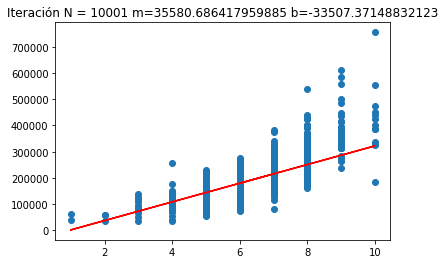

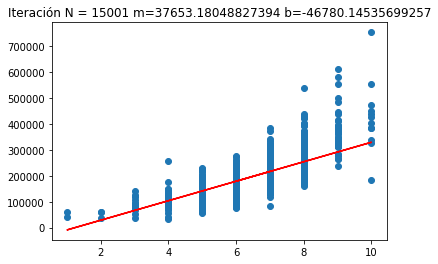

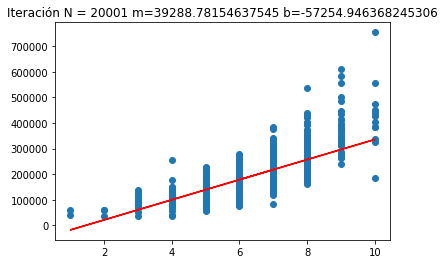

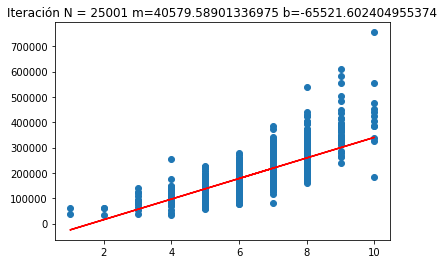

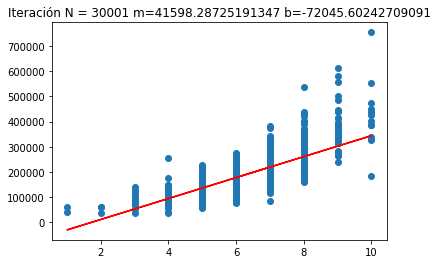

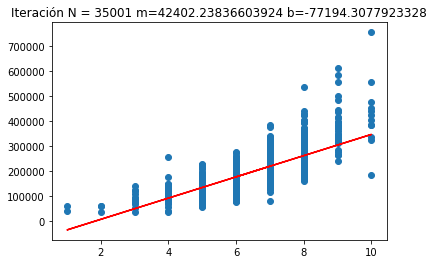

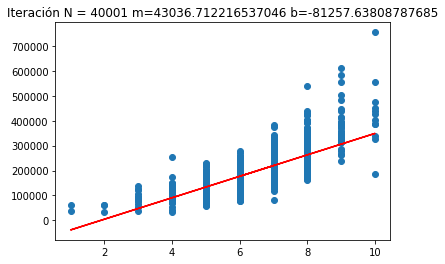

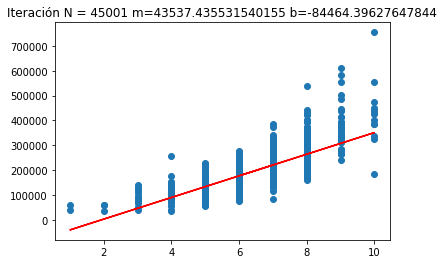

In [36]:
graficar_modelo(training_data[:,1],training_data[:,0], modelo_overall, 5000)

# **Entrenamiento de Variable 1stFlrSF (Learning Rate = 0.000001)**



Error Iteracion: 100 1968092273.0876758
Error Iteracion: 200 1968091451.3653347
Error Iteracion: 300 1968090629.6585293
Error Iteracion: 400 1968089807.967259
Error Iteracion: 500 1968088986.2915235
Error Iteracion: 600 1968088164.6313226
Error Iteracion: 700 1968087342.9866562
Error Iteracion: 800 1968086521.3575244
Error Iteracion: 900 1968085699.7439258
Error Iteracion: 1000 1968084878.1458607
Error Iteracion: 1100 1968084056.563329
Error Iteracion: 1200 1968083234.9963303
Error Iteracion: 1300 1968082413.4448636
Error Iteracion: 1400 1968081591.9089296
Error Iteracion: 1500 1968080770.388528
Error Iteracion: 1600 1968079948.8836577
Error Iteracion: 1700 1968079127.3943188
Error Iteracion: 1800 1968078305.9205112
Error Iteracion: 1900 1968077484.4622343
Error Iteracion: 2000 1968076663.019488
Error Iteracion: 2100 1968075841.5922718
Error Iteracion: 2200 1968075020.1805863
Error Iteracion: 2300 1968074198.7844298
Error Iteracion: 2400 1968073377.4038026
Error Iteracion: 2500 1968072

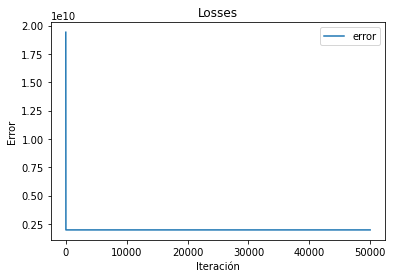

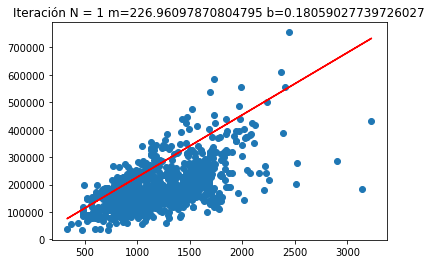

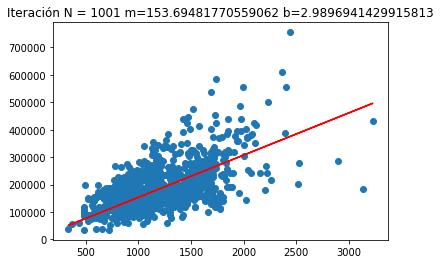

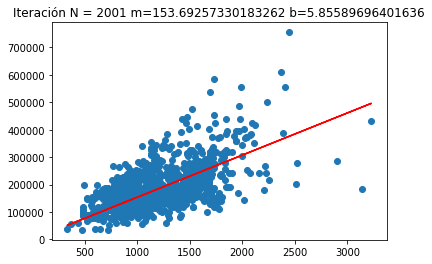

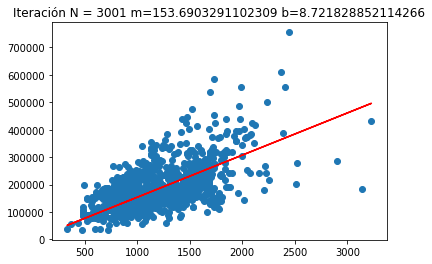

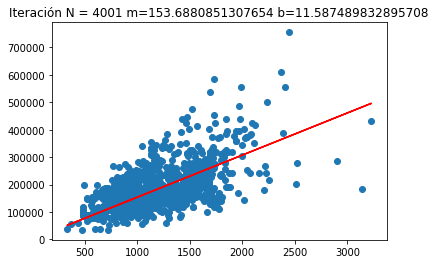

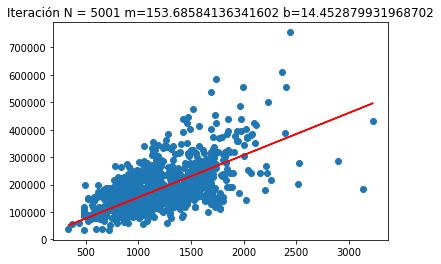

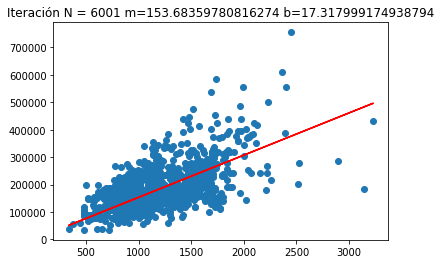

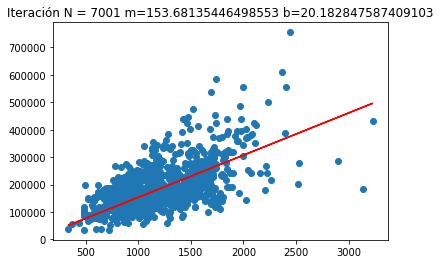

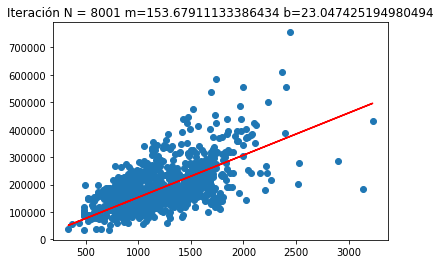

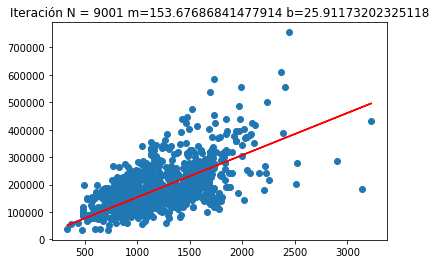

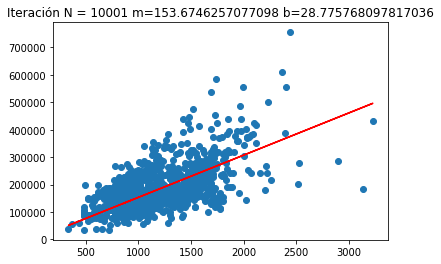

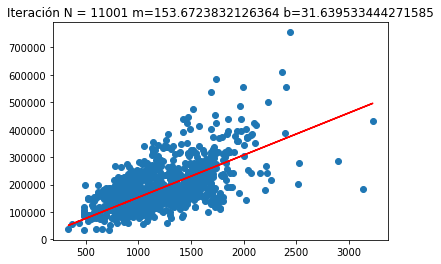

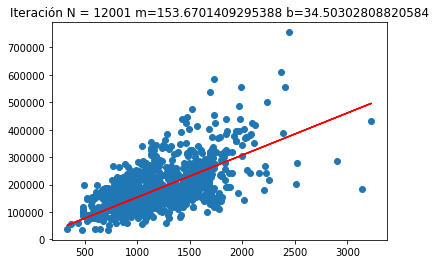

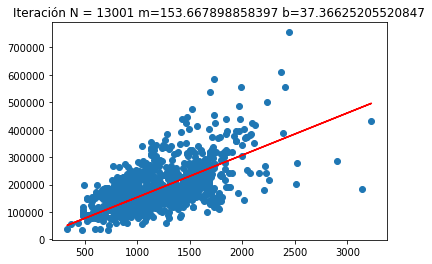

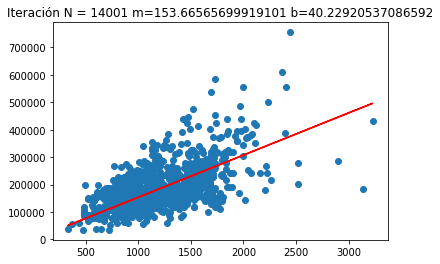

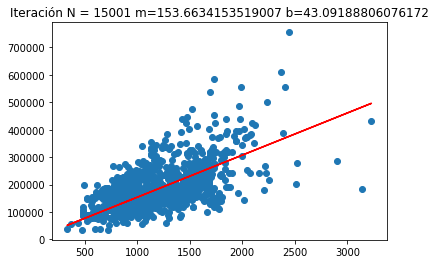

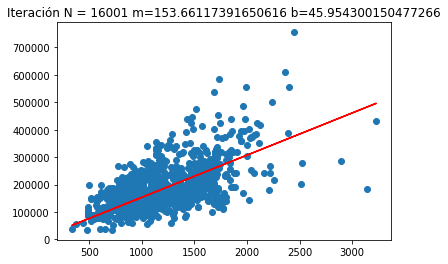

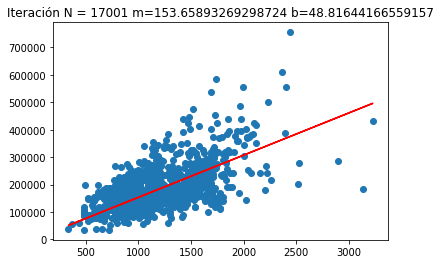

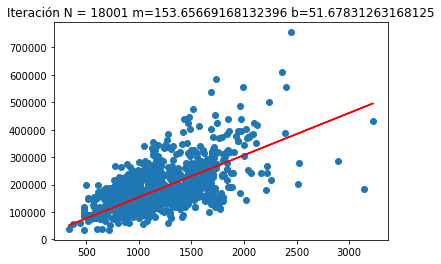

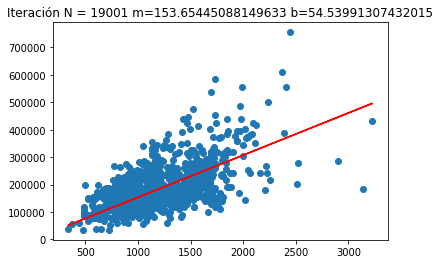

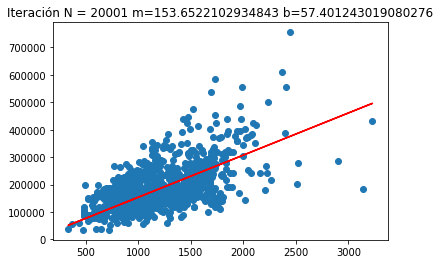

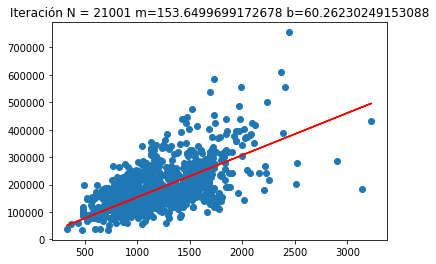

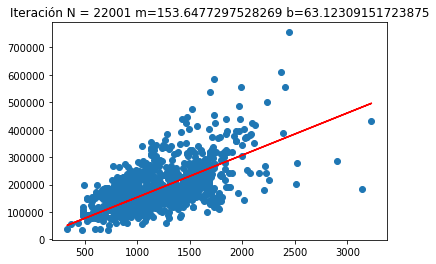

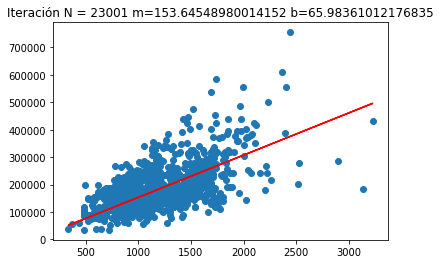

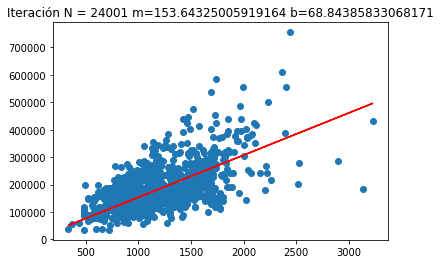

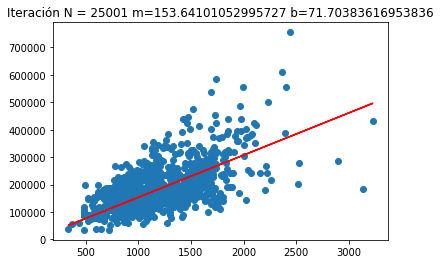

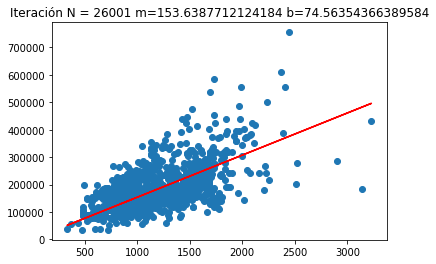

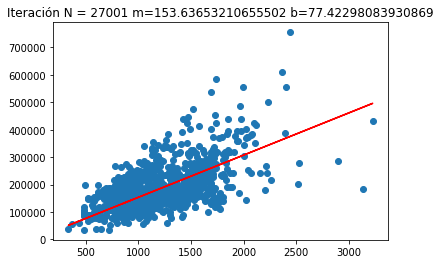

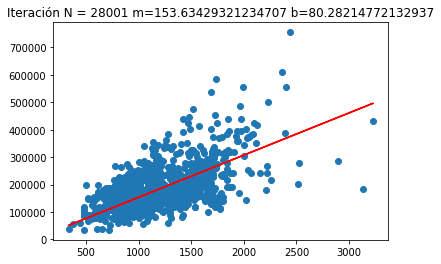

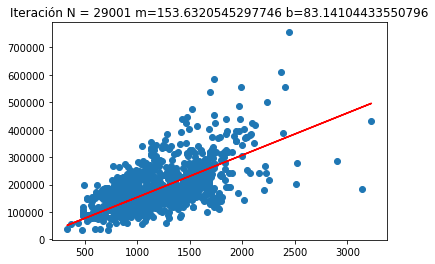

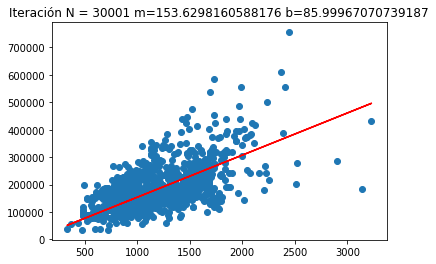

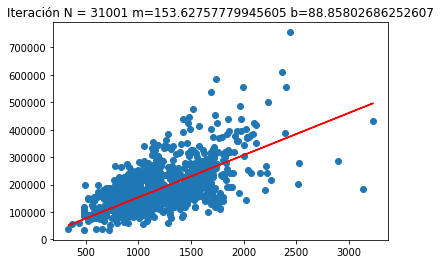

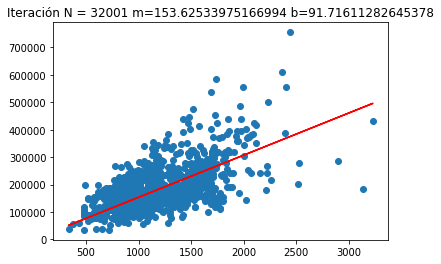

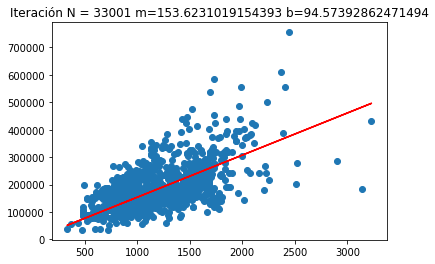

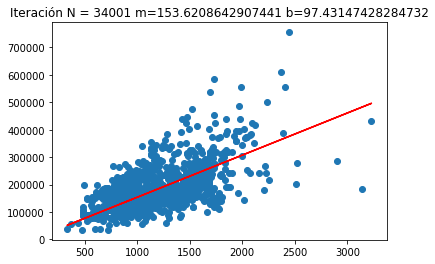

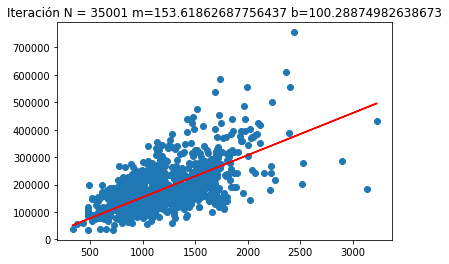

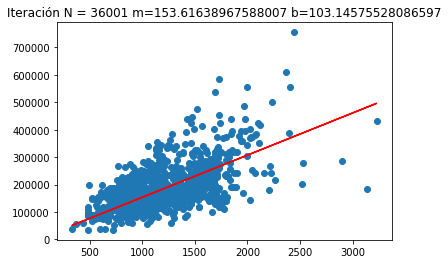

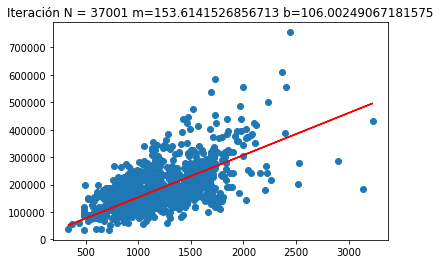

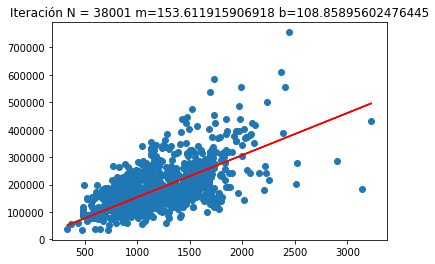

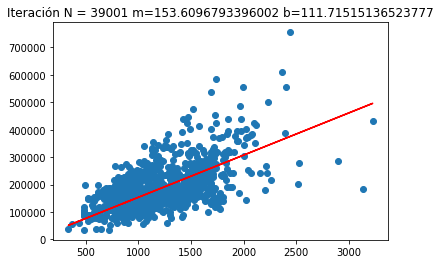

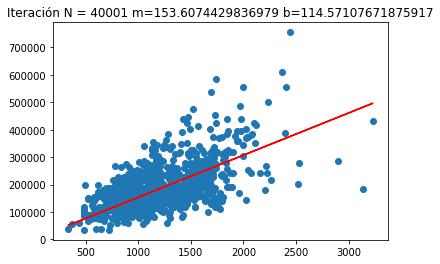

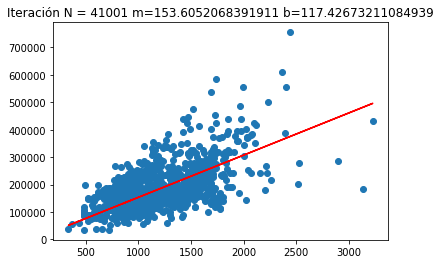

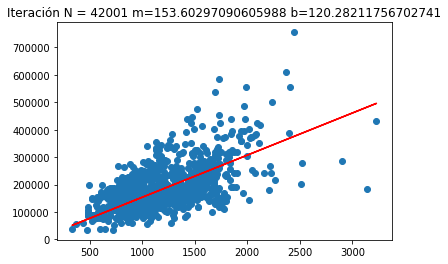

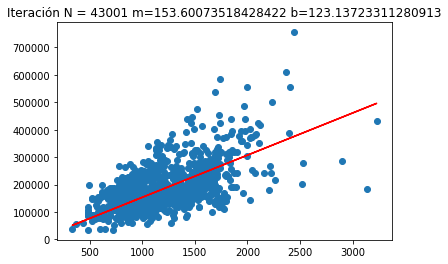

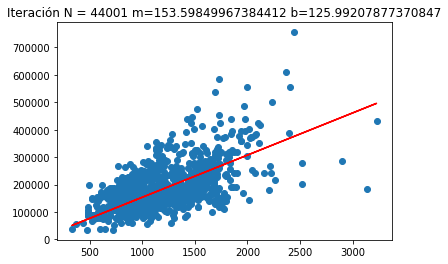

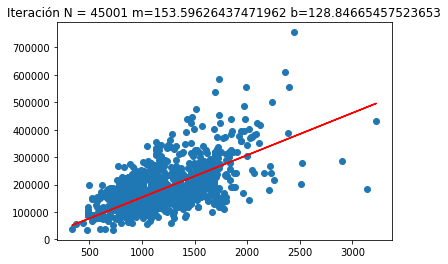

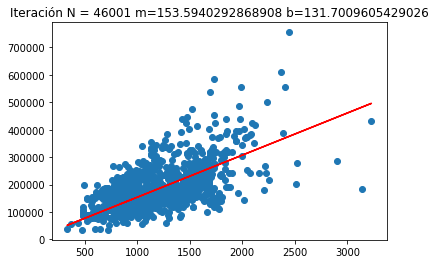

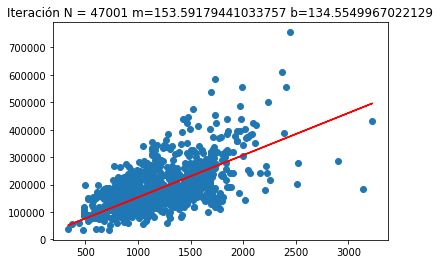

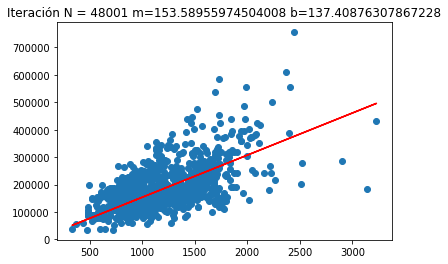

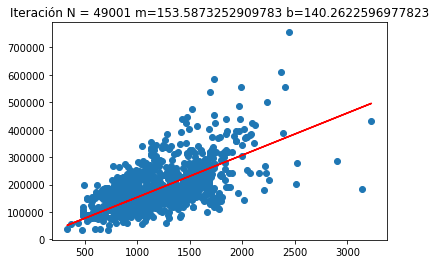

In [165]:
epochs = 1000
error = 100
lr = 0.000001
modelo1stFloSF, errores3 = modelo(training_data[:,2],training_data[:,0],ephoch,error,lr)
graficar_error(errores3)
graficar_modelo(training_data[:,2],training_data[:,0], modelo1stFloSF, 1000)


# **Entrenamiento con Sckilearn para variable OverallQuality**

In [212]:
x = training_data[:,1].reshape(-1,1) 
y = training_data[:,0].reshape(-1,1)
modelo_overall_scki = LinearRegression()
modelo_overall_scki.fit(x, y)

LinearRegression()

# **Entrenamiento con Sckilearn para variable 1stFlrSF**

In [213]:
modelo_1stFlorSF_scki = LinearRegression()
modelo_1stFlorSF_scki.fit(x, y)

LinearRegression()

# **Predicciones**

In [223]:
test_data_reshaped = test_data[:,1].reshape(-1,1)
def prediccion(x, modelo_pormi, modelo_skit):

  ##prediccion con skit 
  prediccion_skit = modelo_skit.predict(x)
  ##prediccion manual 
  ones = np.ones(len(x)).reshape(len(x), 1)
  reshaped_x = np.append(x, ones, axis = 1)
  prediccion_manual = np.matmul(reshaped_x, modelo_pormi[-1])
  promedio = []
  for i in range(0,len(prediccion_manual)):
    promedio.append((prediccion_manual[i] + prediccion_skit[i]) /2)
  return prediccion_manual, prediccion_skit, promedio

def error_manual(x_real,x_prediccion):
  error = []
  for x in range(len(x_real)):
    try: 
      error.append(1/2*( (np.average((x_real[x]-x_prediccion[x])**2))/2))
    except:
      error.append(1/2*( (np.average((x_real[x]-x_prediccion[x])**2))/2))
  return error

# **Predicción y error de variable OverallQueality**

In [225]:
prediccion_manual_overall, prediccion_skit_overall, avg_overall = prediccion(training_data[:,1].reshape(-1,1), modelo_overall, modelo_overall_scki)
error_manual_overral_manual_Overall = np.average(error_manual(training_data[:,0].reshape(-1,1), prediccion_manual_overall))
error_manual_overral_skit_Overall = np.average(error_manual(training_data[:,0].reshape(-1,1), prediccion_skit_overall))

print("Error de prediccion Skit: "+str(error_manual_overral_skit_Overall))
print("Error de prediccion manual:"+str(error_manual_overral_manual_Overall))
print("Promedio: "+str(np.average(avg_overall)))

Error de prediccion Skit: 573458109.7291845
Error de prediccion manual:574546648.3352053
Promedio: 180814.58236547228


# **Predicción y error de variable 1stFlrSF**

In [226]:
prediccion_manual_1st, prediccion_skit_1st, avg_1st = prediccion(training_data[:,2].reshape(-1,1), modelo1stFloSF, modelo_1stFlorSF_scki)
error_manual_overral_manual_1st = np.average(error_manual(training_data[:,0].reshape(-1,1), prediccion_manual_1st))
error_manual_overral_skit_1st = np.average(error_manual(training_data[:,0].reshape(-1,1), prediccion_skit_1st))

print("Error de prediccion Skit: "+str(error_manual_overral_skit_1st))
print("Error de prediccion manual: "+str(error_manual_overral_manual_1st))
print("Promedio: "+str(np.average(avg_1st)))

Error de prediccion Skit: 753653398386371.0
Error de prediccion manual: 983842074.8870302
Promedio: 26296117.44700377


# **Comparación de errores obtenidos**

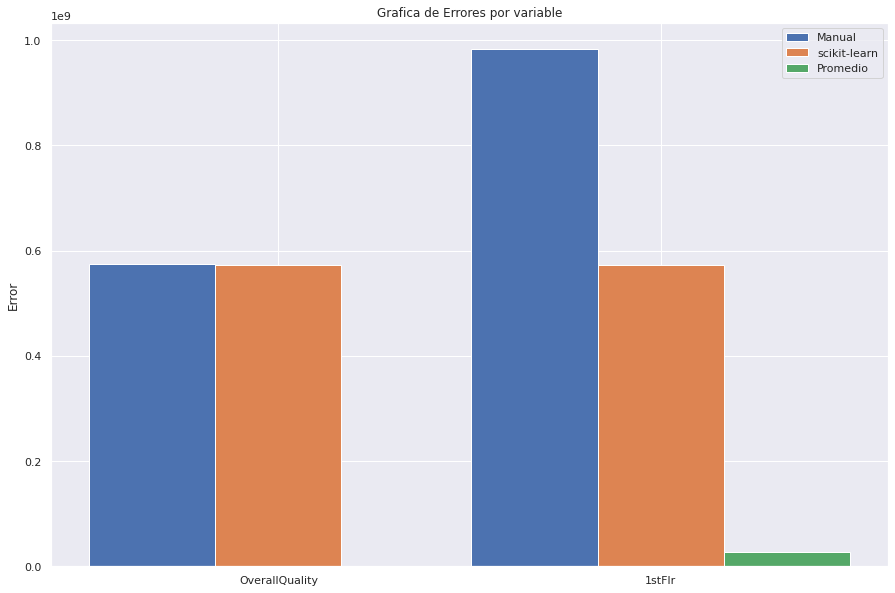

In [228]:
f, ax = plt.subplots(figsize=(15,10))
labels = ["OverallQuality", "1stFlr"]
width = 0.33
x_plt = np.arange(len(labels))

manual = ax.bar(x_plt, (error_manual_overral_manual_Overall,error_manual_overral_manual_1st), width, label='Manual')
skit = ax.bar(x_plt + width, (error_manual_overral_skit_Overall,error_manual_overral_skit_Overall), width, label='scikit-learn')
avg = ax.bar(x_plt + (2*width), (np.average(avg_overall),np.average(avg_1st)), width, label='Promedio')

ax.set_ylabel('Error')
ax.set_title('Grafica de Errores por variable')
ax.set_xticks(x_plt + width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

